<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Cost-Functions-and-Solutions-To-the-Optimization-Problem" data-toc-modified-id="Cost-Functions-and-Solutions-To-the-Optimization-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cost Functions and Solutions To the Optimization Problem</a></span><ul class="toc-item"><li><span><a href="#The-Bad-News" data-toc-modified-id="The-Bad-News-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The Bad News</a></span></li><li><span><a href="#The-Good-News" data-toc-modified-id="The-Good-News-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The Good News</a></span><ul class="toc-item"><li><span><a href="#🧠-Knowledge-Check" data-toc-modified-id="🧠-Knowledge-Check-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>🧠 Knowledge Check</a></span></li><li><span><a href="#More-Log-Loss-Resources" data-toc-modified-id="More-Log-Loss-Resources-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>More Log-Loss Resources</a></span></li></ul></li></ul></li><li><span><a href="#Digging-Deeper-into-Logistic-Regression" data-toc-modified-id="Digging-Deeper-into-Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Digging Deeper into Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Preparing-Data" data-toc-modified-id="Preparing-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing Data</a></span></li><li><span><a href="#Train-Logistic-Regression" data-toc-modified-id="Train-Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train Logistic Regression</a></span></li><li><span><a href="#Interpreting-Logistic-Regression-Coefficients" data-toc-modified-id="Interpreting-Logistic-Regression-Coefficients-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Interpreting Logistic Regression Coefficients</a></span></li></ul></li><li><span><a href="#Putting-It-All-Together:-Training-Logistic-Regression" data-toc-modified-id="Putting-It-All-Together:-Training-Logistic-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Putting It All Together: Training Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Load-and-Explore-Data" data-toc-modified-id="Load-and-Explore-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load and Explore Data</a></span></li><li><span><a href="#Create-and-Train-Logistic-Regression-Model" data-toc-modified-id="Create-and-Train-Logistic-Regression-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create and Train Logistic Regression Model</a></span><ul class="toc-item"><li><span><a href="#Optional:-Evaluate-the-Model-with-Cross-Validation" data-toc-modified-id="Optional:-Evaluate-the-Model-with-Cross-Validation-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Optional: Evaluate the Model with Cross-Validation</a></span></li><li><span><a href="#Optional:-Rinse-and-Repeat---Multiple-Models" data-toc-modified-id="Optional:-Rinse-and-Repeat---Multiple-Models-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Optional: Rinse and Repeat - Multiple Models</a></span></li></ul></li><li><span><a href="#Final-Evaluation" data-toc-modified-id="Final-Evaluation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Final Evaluation</a></span><ul class="toc-item"><li><span><a href="#Training-Set" data-toc-modified-id="Training-Set-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Training Set</a></span></li><li><span><a href="#Testing-Set" data-toc-modified-id="Testing-Set-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Testing Set</a></span></li></ul></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Level-Up" data-toc-modified-id="Level-Up-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level Up</a></span><ul class="toc-item"><li><span><a href="#More-Generalizations:-Other-Link-Functions,-Other-Models" data-toc-modified-id="More-Generalizations:-Other-Link-Functions,-Other-Models-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>More Generalizations: Other Link Functions, Other Models</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

# For demonstrative purposes
from scipy.special import logit, expit
from sklearn import datasets

# REVIEW: https://quantifyinghealth.com/interpret-logistic-regression-coefficients/

# Objectives

- Explain the form of logistic regression
- Explain how to interpret logistic regression coefficients
- Use logistic regression to perform a classification task

# Cost Functions and Solutions To the Optimization Problem

Unlike the least-squares problem for linear regression, no one has yet found a closed-form solution to the optimization problem presented by logistic regression. But even if one exists, the computation would no doubt be so complex that we'd be better off using some sort of approximation method instead.

But there's still a problem.

Recall the cost function for linear regression: <br/><br/>
$SSE = \Sigma_i(y_i - \hat{y}_i)^2 = \Sigma_i(y_i - (\beta_0 + \beta_1x_{i1} + ... + \beta_nx_{in}))^2$.

This function, $SSE(\vec{\beta})$, is convex.

If we plug in our new logistic equation for $\hat{y}$, we get: <br/><br/>
$SSE_{log} = \Sigma_i(y_i - \hat{y}_i)^2 = \Sigma_i\left(y_i - \left(\frac{1}{1+e^{-(\beta_0 + \beta_1x_{i1} + ... + \beta_nx_{in})}}\right)\right)^2$.

## The Bad News

*This* function, $SSE_{log}(\vec{\beta})$, is [**not** convex](https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c).

That means that, if we tried to use gradient descent or some other approximation method that looks for the minimum of this function, we could easily find a local rather than a global minimum.

> Note that the scikit-learn class *expects the user to specify the solver* to be used in calculating the coefficients. The default solver, [lbfgs](https://en.wikipedia.org/wiki/Limited-memory_BFGS), works well for many applications.

## The Good News

We can use **log-loss** instead:

$\mathcal{L}(\vec{y}, \hat{\vec{y}}) = -\frac{1}{N}\Sigma^N_{i=1}\left(y_iln(\hat{y}_i)+(1-y_i)ln(1-\hat{y}_i)\right)$,

where $\hat{y}_i$ is the probability that $(x_{i1}, ... , x_{in})$ belongs to **class 1**.

**More resources on the log-loss function**:

https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

### 🧠 Knowledge Check

- Is a bigger value (more positive) better or worse than a smaller value?

- What would the log-loss for one data point when the target is $0$ but we predict $1$?

- What would the log-loss for one data point when the target is $0$ but we predict $0$?

### More Log-Loss Resources

# Digging Deeper into Logistic Regression

## Preparing Data

In [2]:
# glass identification dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [3]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


## Train Logistic Regression

In [4]:
# fit a logistic regression model and store the class predictions

logreg = LogisticRegression(random_state=42)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

## Log-Loss

In [5]:
log_loss(y, logreg.predict_proba(X))

0.36150680872607704

### Verifying by Hand

In [6]:
y_hat = logreg.predict_proba(X)[:, 1]

In [7]:
-np.mean([y*np.log(y_hat) + (1-y)*np.log(1-y_hat)])

0.36150680872607704

## Interpreting Logistic Regression Coefficients

In [8]:
logreg.coef_

array([[3.11517927]])

How do we interpret the coefficients of a logistic regression? For a linear regression, the situaton was like this:

- Linear Regression: We construct the best-fit line and get a set of coefficients. Suppose $\beta_1 = k$. In that case we would expect a 1-unit change in $x_1$ to produce a $k$-unit change in $y$.

- Logistic Regression: We find the coefficients of the best-fit line by some approximation method. Suppose $\beta_1 = k$. In that case we would expect a 1-unit change in $x_1$ to produce a $k$-unit change (not in $y$ but) in $ln\left(\frac{y}{1-y}\right)$.

We have:

$\ln\left(\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)}\right) = \ln\left(\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}\right) + k$.

Exponentiating both sides:

$\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)} = e^{\ln\left(\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}\right) + k}$ <br/><br/> $\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)}= e^{\ln\left(\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}\right)}\cdot e^k$ <br/><br/> $\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)}= e^k\cdot\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}$

That is, the odds ratio at $x_1+1$ has increased by a factor of $e^k$ relative to the odds ratio at $x_1$.

For more on interpretation, see [this page](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/all-statistics-and-graphs/coefficients/).

In [9]:
# examine the intercept

logreg.intercept_

array([-6.00934605])

**Interpretation:** For an 'al' value of 0, the log-odds of 'household' is -6.01. What is the probability that glass with an 'al' value of 0 is household glass?

In [10]:
# convert log-odds to probability

#  make sure you standard scale if you want to do default regularization

logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds / (1 + odds)
prob

array([0.00244968])

In [11]:
# examine the coefficient for al

list(zip(feature_cols, logreg.coef_[0]))

[('al', 3.1151792681570174)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 3.12-unit increase in the log-odds of 'household'.

##### Aside: Verifying log-odds to probability

Let's verify this as we change the aluminum content from 1 to 2.

In [12]:
# Prediction for al=1

pred_al1 = logreg.predict_proba([[1]])
pred_al1

/Users/llakes/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.94755733, 0.05244267]])

In [13]:
# Odds ratio for al=1

odds_al1 = pred_al1[0][1] / pred_al1[0][0]
odds_al1

0.05534512023573519

In [14]:
# Prediction for al=2
pred_al2 = logreg.predict_proba([[2]])
pred_al2

/Users/llakes/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.4449707, 0.5550293]])

In [15]:
# Odds ratio for al=2

odds_al2 = pred_al2[0][1] / pred_al2[0][0]
odds_al2

1.2473390003597828

In [16]:
print((np.exp(logreg.coef_[0]) * odds_al1)[0])
print(odds_al2)

1.2473390003597822
1.2473390003597828


##### Aside: Use Coefficients to Generate Prediction

In [17]:
# compute predicted log-odds for al=2 using the equation
x_al = 2
logodds = logreg.intercept_ + logreg.coef_[0] * x_al
logodds

array([0.22101248])

In [18]:
# convert log-odds to odds

odds = np.exp(logodds)
odds

array([1.247339])

In [19]:
# convert odds to probability

prob = odds / (1 + odds)
prob

array([0.5550293])

In [20]:
# compute predicted probability for al=2 using the predict_proba method

logreg.predict_proba(np.array([2.0]).reshape(1, 1))[:, 1]

/Users/llakes/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.5550293])

# Putting It All Together: Training Logistic Regression

Let's take some time to show how you can do use logistic regression in practice.

> Note we've been talking about _binary classification_ but we can also do classification for _multiclass_ problems (more than binary classes).
>
> That's what we'll do for this example.

## Load and Explore Data

In [21]:
# Built in dataset from sklearn
iris = datasets.load_iris()

df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

display(df.head())
display(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
# Note how many different targets there are
df.target.unique()

array([0., 1., 2.])

We can go ahead and explore some graphs to show that it doesn't make sense to do a linear regression

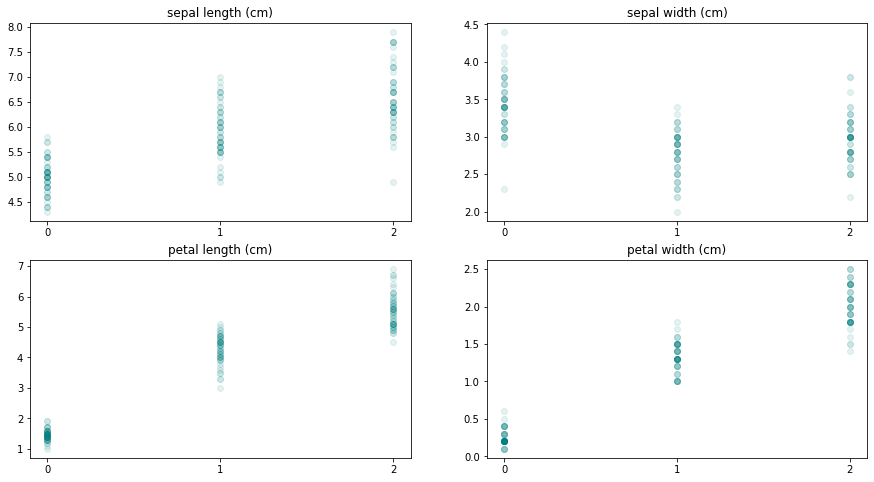

In [23]:
# Creating a large figure
fig = plt.figure(figsize=(15, 8))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df['target'], df.iloc[:, i], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.target.unique())

Preparing the data for classification

In [24]:
# Get the features and then the target
X = df.iloc[:, :-1]
y = df.target

In [25]:
# Normalize the data to help the model
X = normalize(X)
X

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [26]:
# Now each row vector has unit length
sum([x**2 for x in X[0, :]])

0.9999999999999998

In [27]:
# Split for test & training  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## Create and Train Logistic Regression Model

There's a lot of different parameters for `LogisticRegression`. Check out the documentation for more info: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [28]:
my_model = LogisticRegression(
            C=1e3,             # Smaller values -> more regularization
            max_iter=1e3,      # Ensure we eventually reach a solution
            solver='lbfgs',    # (Default) Can optimize depending on problem
            multi_class='ovr'  # (Default) Will try to do multiclass classification 
)

In [29]:
# Fit/Train the model
my_model.fit(X_train, y_train)
my_model

InvalidParameterError: The 'max_iter' parameter of LogisticRegression must be an int in the range [0, inf). Got 1000.0 instead.

### Optional: Evaluate the Model with Cross-Validation

In practice, we should make this a practice but we skip it if time is running low

In [ ]:
cv_results = cross_validate(
                    estimator=my_model,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

In [ ]:
cv_results['train_score']

In [ ]:
cv_results['test_score']

In [ ]:
def cv_overall(cv_results):
    val_results = cv_results['test_score']
    result_str = f'{val_results.mean():.3f} ± {val_results.std():.3f}'
    return result_str

In [ ]:
cv_overall(cv_results)

In [ ]:
# Let's save these results for later
models = {}

models['model_1'] = {'model': my_model, 'cv':cv_results}

In [ ]:
# Overall Training Score
my_model.score(X_train,y_train)

### Optional: Rinse and Repeat - Multiple Models

Let's try out a few more models for fun

In [ ]:
# Adjust the regularization C
c_values = [1e-1, 1e2, 1e4, 1e6]

# Start at #2 since we have "model_1" already
for i, c in enumerate(c_values, start=2):
    
    print(f'Model #{i} with C={c}')
    new_model = LogisticRegression(C=c, max_iter=1e3)
    
    # Cross-validation
    print('Cross-validating model with training data...')
    cv_results = cross_validate(
                    estimator=new_model,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
    )
    print(f'\tCross-Validation Score: {cv_overall(cv_results)}')
    
    # Train/fit with the full training set
    print('Fitting model to full training set...')
    new_model.fit(X_train, y_train)
    train_score = new_model.score(X_train, y_train)
    print(f'\tScore on training set: {train_score:.3f}')
    
    # Save results
    print('Saving Results...')
    models[f'model_{i}'] = {'model': new_model, 'cv': cv_results}
    
    print('\n','-'*30,'\n')

## Final Evaluation

In [ ]:
best_model = models['model_5']['model']
best_model

In [ ]:
# Let's get predictions for training & testing sets
y_hat_train = best_model.predict(X_train)
y_hat_test = best_model.predict(X_test)

### Log-Loss on Best Model

In [ ]:
print(log_loss(y_train, best_model.predict_proba(X_train)))
print(log_loss(y_test, best_model.predict_proba(X_test)))

### Training Set

In [ ]:
# Was our model correct?
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

### Testing Set

In [ ]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

# Exercise

Split the data below into train and test, and then convert the y-values (`geysers.kind`) into 1's and 0's. Then use `sklearn` to build a logistic regression model of whether Old Faithful's eruption wait time is long or short, based on the duration of the eruption. Finally, find the points in the test set where the model's prediction differs from the true y-value. How many are there?

In [ ]:
geysers = sns.load_dataset('geyser', **{'usecols': ['duration', 'kind']})

In [ ]:
geysers.head()

# Level Up

## More Generalizations: Other Link Functions, Other Models

Logistic regression's link function is the logit function, but different sorts of models use different link functions.

[Wikipedia](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function) has a nice table of generalized linear model types and their associated link functions.